Friedman-Nemenyi tests

[1.         2.94444444 2.05555556]
pvalue=0.0000011
tf=307.0000000000054
cd=0.7813333333333332


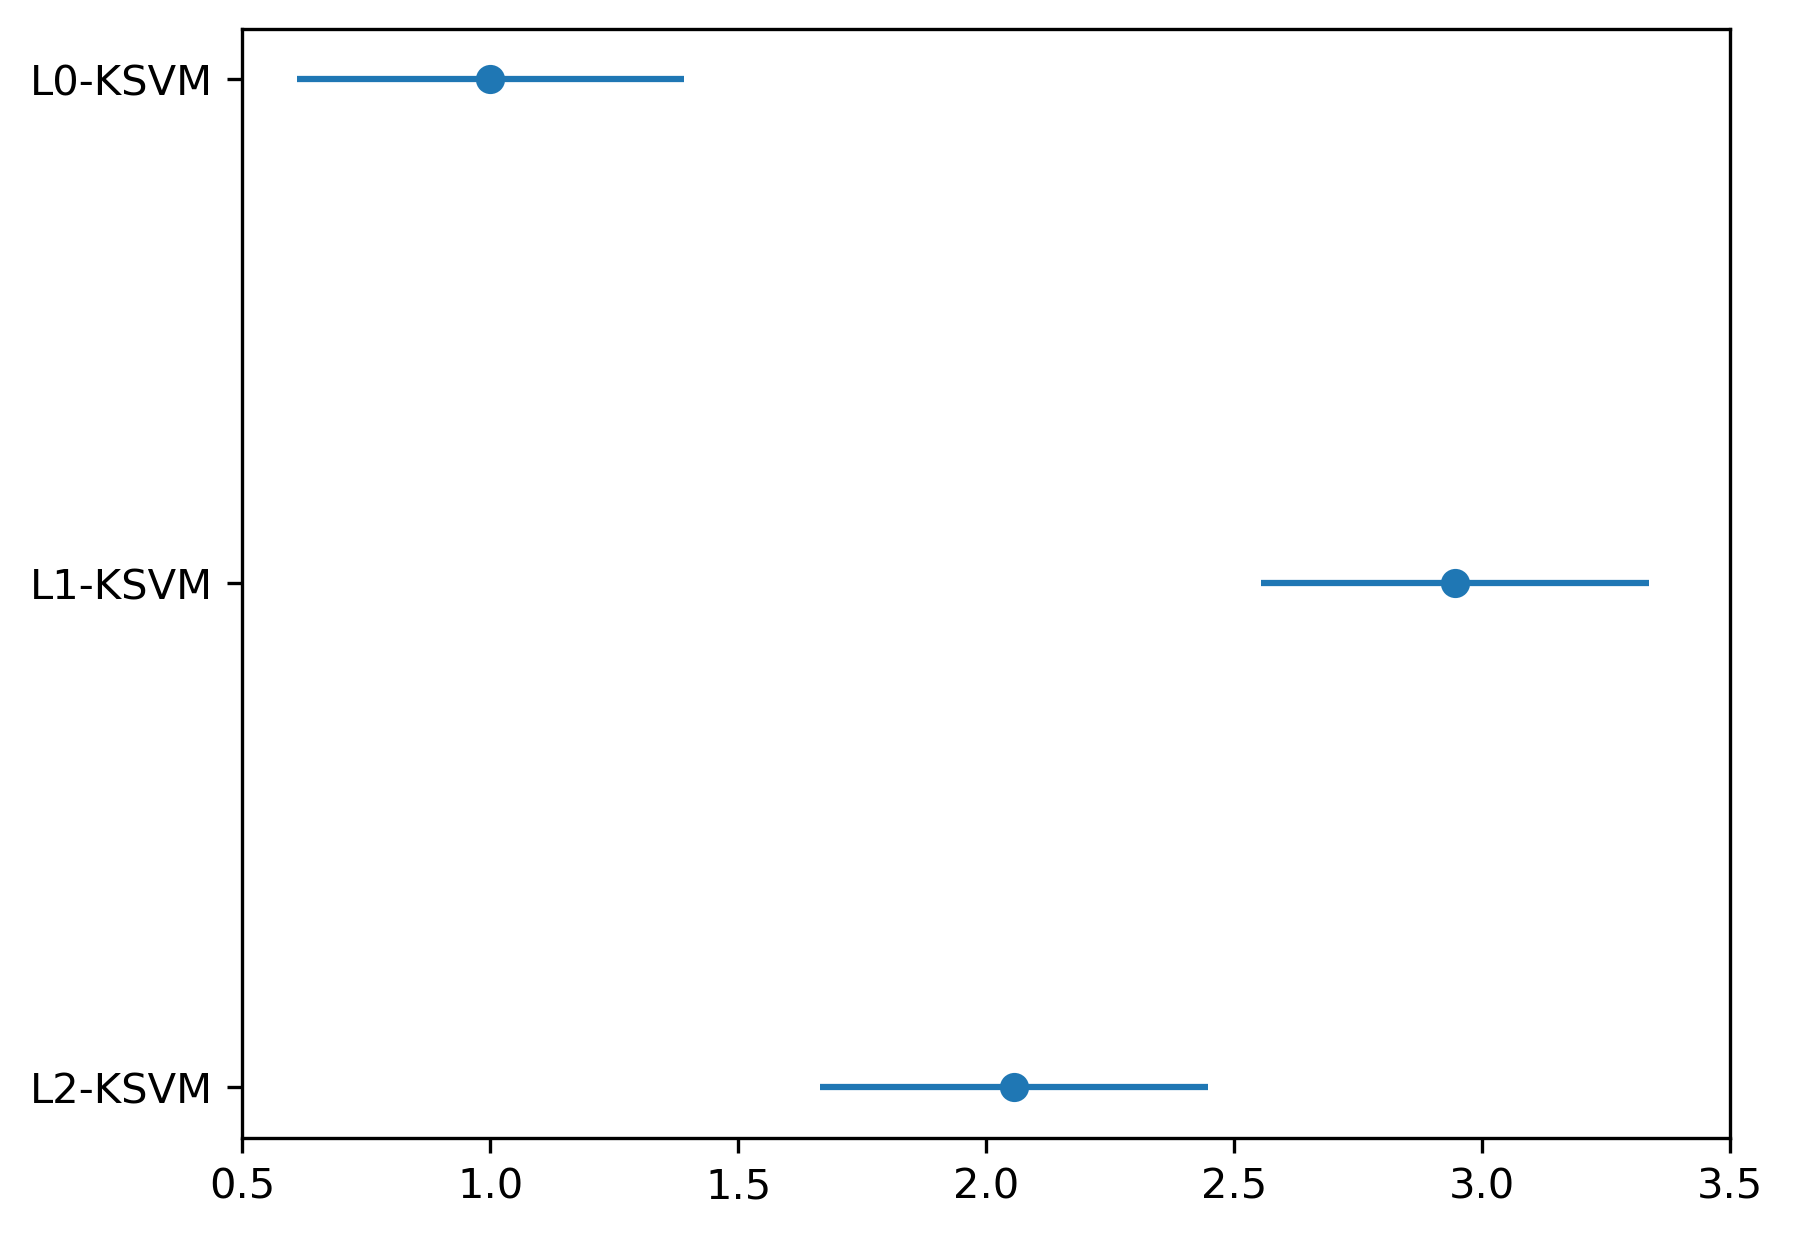

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
 
 
def Friedman(n, k, data_matrix):
    '''
    Friedman 检验
    :param n:数据集个数
    :param k: 算法种数
    :param data_matrix:排序矩阵
    :return:T1
    '''
 
    row, col = data_matrix.shape  
    rank_mean = list()
    for i in range(col):  
        rank_mean.append(data_matrix[:, i].mean()) 
    sum_mean = np.array(rank_mean) 
    print(sum_mean)
 
    sum_ri2_mean = (sum_mean ** 2).sum()  
    result_Tx2 = (12 * n) * (sum_ri2_mean - ((k * ((k + 1) ** 2)) / 4)) / (k * (k + 1))  
    result_Tf = (n - 1) * result_Tx2 / (n * (k - 1) - result_Tx2) 
    return result_Tf
 
def nemenyi(n, k, q):
    '''
    Nemenyi post hoc 
    :param n: number of datasets
    :param k: number of compared algorithms
    :param q:
    :return:
    '''
    cd = q * (np.sqrt((k * (k + 1) / (6 * n))))
    return cd


# rank according to support vector
data = np.array([[1,4,1],[1,4,1],[1,3,2],[1,3,2],[1,3,2],[1,3,2],[1,3,2],[1,3,2],[1,4,1],[1,3,2],[1,3,2],[1,3,2],[1,3,2],[1,2,3],[1,2,3],[1,3,2],[1,2,3],[1,2,3]]) #all
stats,pvalue= scipy.stats.friedmanchisquare([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[4,4,3,3,3,3,3,3,4,3,3,3,3,2,2,3,2,2],[1,1,2,2,2,2,2,2,1,2,2,2,2,3,3,2,3,3])

# rank according to the testing accuaracy
# data = np.array([[2,2,2],[2,2,2],[2,2,2],[1,3,2],[1,4,1],[2,2,2],[2.5,2.5,1],[2,3,1],[2,2,2],[1,2.5,2.5],[2,2,2],[1,4,1],[3,1,2],[2.5,2.5,1],[1,3,2],[1,3,2],[1,2,3],[1,4,1]])
# stats,pvalue= scipy.stats.friedmanchisquare([2,2,2,1,1,2,2.5,2,2,1,2,1,3,2.5,1,1,1,1],[2,2,2,3,4,2,2.5,3,2,2.5,2,4,1,2.5,3,3,2,4],[2,2,2,2,1,2,1,1,2,2.5,2,1,2,1,2,2,3,1])

T1 = Friedman(18, 3, data)
cd = nemenyi(18, 3, 2.344)

print('pvalue={:,.7f}'.format(pvalue))
print('tf={}'.format(T1))
print('cd={}'.format(cd))
 
# CD
row, col = data.shape  
rank_mean = list()
for i in range(col):  
    rank_mean.append(data[:, i].mean()) 
sum_mean = np.array(rank_mean)
#sum_mean： rank_x = list(map(lambda x: np.mean(x), data.T))  
name_y = ["L0-KSVM", "L1-KSVM", "L2-KSVM"]

min_ = sum_mean - cd / 2
max_ = sum_mean + cd / 2

name_y.reverse()
sum_mean = list(sum_mean)
sum_mean.reverse()
max_ = list(max_)
max_.reverse()
min_ = list(min_)
min_.reverse()
# 开始画图
plt.figure(dpi=300)
plt.scatter(sum_mean, name_y)  # 绘制散点图
plt.hlines(name_y, max_, min_)
plt.xlim(0.5,3.5)
plt.show()

# [1.         2.94444444 2.05555556]
# pvalue=0.0000011
# tf=307.0000000000054
# cd=0.7813333333333332

 Wilcoxon signed-rank test
 
 https://docs.scipy.org/doc/scipy-1.10.0/reference/generated/scipy.stats.wilcoxon.html

In [6]:
import numpy as np
#ACC
L0_ACC=np.array([100,100,100,97.5,89,81,99.5,99.5,100,97.5,88.5,81,97.37,83.33,78.25,85.19,100,77.25])
L1_ACC=np.array([100,100,100,94.5,88.5,81,99.5,99.25,100,97,88.5,80.5,98.68,83.33,75,82.41,99.71,77])
L2_ACC=np.array([100,100,100,97,89,81,100,99.75,100,97,88.5,81,98.25,84.06,77.27,84.26,99.13,77.25])
#NSV
L0_NSV=np.array([11,10,9,16,19,18,10,13,10,23,16,27,79,105,98,76,85,284])
L1_NSV=np.array([19,12,14,29,94,179,24,26,25,41,106,166,87,184,275,105,130,379])
L2_NSV=np.array([11,10,10,20,73,141,12,15,11,30,81,148,83,188,287,97,151,418])

#Differences
#d=L0_NSV-L1_NSV #(0.0, 0.00019575042504300203)
#d=L0_NSV-L2_NSV #(0.0, 0.0004348772241765822)
#d=L0_ACC-L1_ACC  #(7.0, 0.03604929557974721)
d=L0_ACC-L2_ACC #16.0, 0.4396586365458026)
print('difference',d)
from scipy.stats import wilcoxon
res = wilcoxon(d,method='approx')
res.statistic, res.pvalue

difference [ 0.    0.    0.    0.5   0.    0.   -0.5  -0.25  0.    0.5   0.    0.
 -0.88 -0.73  0.98  0.93  0.87  0.  ]


(16.0, 0.4396586365458026)